# Minimizing cluster energy usage

We wish to minimize our cost function

$$C = p_n T n_{max} + \int_0^T dt \cdot p(t)\left (n(t)u(t)+ u_w \frac{dn(t) }{d t}\left ( \frac{dn(t) }{d t} > 0\right  ) \right )  $$

where $p(t)$ is the price of power, $0<n(t)<n_{max}$ is the number of running nodes, $u(t)$ is the CPU power usage, $u_w$ is the wasted power from turning on a node, $p_n$ is the cost of purchasing a node divided by the lifetime of the node, and $n_{max}$ is the total number of nodes in the cluster.  

CPU power usage takes the form 

$$u(t) = u_0 + u_v \cdot r(t)$$

where $0<r(t)<1$ is the fraction of cpu usage, $u_0$ is the cost of an idling node and $u_v$ is the variable cost for doing $r$ work on a machine. 

We wish to minimize C subject to the constraint

$$\int_0^T dt \cdot n(t)r(t) = S$$

where S is the sum of CPU time submitted, $s(t)$, over the period T

$$S = \int_0^T dt \cdot s(t)$$

Finally, we recognize that a queue will form of length $q(t)$ subject to the equation

$$\frac{dq(t)}{dt} = s(t) - n(t)r(t)$$

which gives rise to a wait time, $\tau(t)$, before any individual job will begin, where $\tau(t)$ is computed via

$$\int_t^{t+\tau(t)} n(t')r(t') dt' = q(t)$$

Therefore, given a particular $p(t)$, $s(t)$, $u_0$, $u_v$, $u_w$, and $p_n$, we can calculate the optimum $n(t)$, $r(t)$, and $n_{max}$ over the time period $T$.  This can then be used to compute the wait time $\tau(t)$.

## simple constant price

Given the simplest case of constant price, $p_0$, it is obvious that $n(t)$ would also be constant (since varying $n$ would add to the wasted power in turning nodes on and off).  The optimal choice of $n$ is just the constant value such that

$$T\cdot n = S$$

Additionally, $n=n_{max}$ and $r(t)=1$ for similarly obvious reasons.

So the simple case of constant price is not entirely too interesting.

## temporary price spike

As a second example we explore the situation where for a timeperiod $t_s$ we see a "price spike" from $p_0$ to $p_s$.

Here the number of running machines will change stepwise between a high number of running machines, $n_H=n_{max}$, and a low number of running machines, $n_L$, and a high and low CPU utilization $r_H=1$, $r_L$, with a corresponding $u_H$ and $u_L$ as defined above.  The high usage will occur during the cheap energy supply, and the low usage will occur during the price spike.  Therefore we can rewrite our cost function as 

$$C = p_n n_H T + p_0 (u_0 + u_v) n_H (T-t_s) + p_s (u_0 + u_v r_L) n_L t_s + p_0 u_w (n_H-n_L)$$

with the constraint

$$ n_H (T-t_s) + n_L r_L t_s = S$$

Inserting the constraint into our cost function to replace $r_L$ yields 

$$C = p_s u_v S + n_L \cdot( p_s u_0 t_s - p_0 u_w t_w) + n_H \cdot (p_n T + p_0 u_w t_w -(\Delta p u_v - p_0 u_0)(T-t_s))$$

where we've introduce the price difference, $\Delta p = p_s - p_0$.

We can analyze the change in costs as a function of $n_L$ and $n_H$ to determine the optimal cluster setup for known variables, $t_s$, $p_s$, $p_n$, $p_0$, $u_0$, $u_v$, and $u_w$. 

We can see that if $ p_s u_0 t_s < p_0 u_w t_w$ then the cost of powering off nodes exceeds the cost of running those nodes idle so $n_L = n_H$ and 

$$r_L = \frac{S}{n_H t_s} - (T-t_s)/t_s$$

Otherwise if $ p_s u_0 t_s > p_0 u_w t_w$ then powering off nodes saves money and the nodes that remain on run at full capacity $r_L = 1$, and $n_L$ is minimized subject to constraints giving

$$n_L = \frac{S}{t_s} - n_H(T-t_s)/t_s$$

If we can freely choose $n_H$ to optimize cost, we see that whenever 

$$(\Delta p u_v - p_0 u_0)(T-t_s) > p_n T + min(p_0 u_w t_w,p_s u_0 t_s)$$

we will increase $n_H$ (buy more machines) until all the work is done during the cheap energy period. Therefore $n_H = S/(T-t_s)$ and either $n_L$ or $r_L$ is $0$.

If, however, 

$$(\Delta p u_v - p_0 u_0)(T-t_s) < p_n T + min(p_0 u_w t_w,p_s u_0 t_s)$$ 

we will simply ignore the price spike and minimize $n_H$ such that $n_H = n_L = S/T$, $r_L = 1$.

## daily fluctuating price

Next we add a simple periodic fluctuation to the price without any long term trend. We will therefore set the window $T$ equal to one period of the oscillation. 

$$p(t) = p_0 + p_f sin(2 \pi t/T)$$

where $p_f$ is simply the size of the price fluctuation.

Numerically solving this problem (assuming for simplicity $r=1$, and therefore $u(t)=u_m=u_0+u_v$), we see an all or none transition between two levels of node usage, $n_L$ and $n_H$, which occurs when the price crosses some threshold, $p_c$.  If the amount of time, in the "low" state is labeled $T_L$, a bit of algebra provides us with the cost function

$$C = n_H(T-T_L)p_0 u_m + n_L T_L p_0 u_m - \frac{T p_f u_m}{\pi} (n_H-n_L) sin(\pi T_L / T) + (n_H-n_L) u_w p_c + p_n Tn_{max}$$

where we can find $T_L$ from the price threshold via
$$p_c = p_0 + p_f cos(\pi T_L /T)$$

We can also rewrite the constraint
$$n_L T_L + n_H (T-T_L)= S$$

We'd like to find $n_L$, $n_H$, and $T_L$ under conditions where $0<n_L<n_H<n_{max}$ and $0<T_L<T$

Using our constraint, we can rewrite $T_L$.  So the cost function becomes

$$C = Sp_0 u_m - \frac{T p_f u_m}{\pi} (n_H-n_L) sin(\pi \frac{n_H-S/T}{n_H-n_L}) + (n_H-n_L) u_w (p_0 + p_f cos(\pi \frac{n_H-S/T}{n_H-n_L}))  + p_n T n_{max}$$

Simplifying a bit and renaming $n_e = n_H-S/T$, $\Delta n = n_H-n_L$, and $u_w = u_mt_w$ (power wasted on turning on machines is just the product of the max energy usage and the time it takes to power on the machine) we get

$$C/u_m = Sp_0  + \Delta n  \cdot \left ( t_w p_0 +  p_f \left ( -\frac{T}{\pi} sin(\pi n_e / \Delta n) + t_w cos(\pi n_e / \Delta n) \right ) \right )  + p_n T n_{max}$$

We can normalize by $u_m$ and rewrite this in the form 

$$ C = C_0 + \Delta n \cdot (A -  R sin(\pi n_e / \Delta n - \alpha) ) $$

with $C_0= Sp_0 + p_n T n_{max}$, $A=t_wp_0$, $R = p_f\sqrt{(T /\pi)^2 + t_w^2}$ and $ tan(\alpha) = t_w\pi/T$.

By inspection we can see that, 

1) energy savings is only possible when $R>A$,

2) holding $\Delta n$ constant, any minimum, if it exists, occurs when $n_e / \Delta n - \alpha/\pi = 1/2$, and

3) when a minimum exists, we can always lower the price by increasing $\Delta n$ (i.e. decreasing the number of machines running when the price is high).

The only issue is that $\Delta n$ and $n_e$ are constrained by $0 < n_L < S/T$ and $S/T < n_H < n_{max}$.  We are therefore searching for a solution with constraints $0 < n_e < n_{max} - S/T$ and $n_e < \Delta n < n_e + S/T$.

We are most interested in the realistic cases where the time wasted on machine power on, $t_w$, is short relative to timescale of the power price fluctuation, $T$.  In this case $\sqrt{(T /\pi)^2 + t_w^2} \approx T/\pi$ and $ tan(\alpha) \approx \alpha $ so we can further simplify our cost function to

$$ C/p_0 = C_0/p_0 + \frac{T}{\pi}\Delta n \cdot \left ( \frac{\pi t_w}{T} -  \frac{p_f}{p_0} sin(\pi (\frac{n_e}{ \Delta n} - \frac{t_w }{T})) \right ) $$

Provided that the price fluctuation, $p_f/p_0$, is large enough realtive to the wasted time, $t_w/T$, the main result just comes down to these 3 possibilities:

1) $S/T << n_{max}$ leads to a situation where $n_L = 0$ and $n_H $ is just enough so that $S$ gets done.


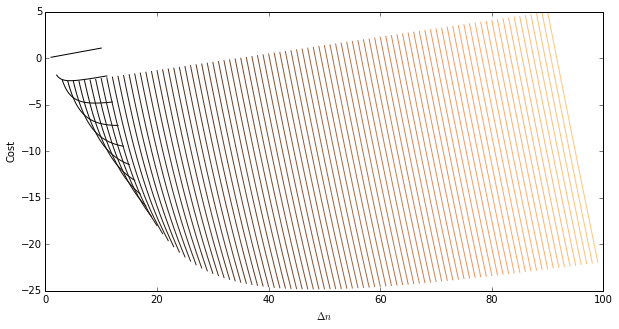

In [4]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

nm = 100
alph = 0.01

ST = 10
plt.figure(figsize=(10,5))

for ne in range(0,nm-ST):
    dn = np.linspace(ne+1,ne+ST,80)
    C = dn*(0.1-1*np.sin(np.pi*ne/dn -alph))
    plt.plot(dn,C,color=plt.cm.copper(ne/float(nm-ST)))
    plt.ylabel('Cost')
    plt.xlabel('$\Delta n$')

2) $S/T$ just less than $n_{max}$ leads to a situation where $n_H = n_{max}$ and $n_L$ is just less than $S/T$ 

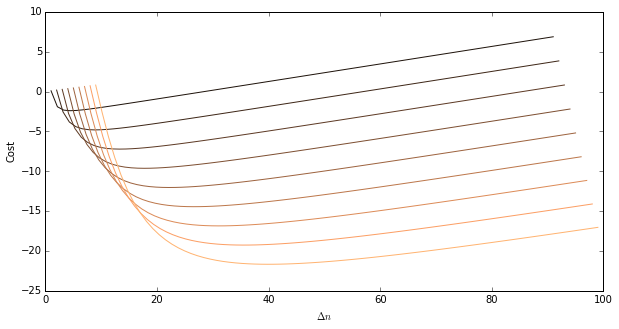

In [64]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

nm = 100
alph = 0.01

ST = 90

plt.figure(figsize=(10,5))
for ne in range(1,nm-ST):
    dn = np.linspace(ne,ne+ST,80)
    C = dn*(0.1-1*np.sin(np.pi*ne/dn -alph))
    plt.plot(dn,C,color=plt.cm.copper(ne/float(nm-ST)))
    plt.ylabel('Cost')
    plt.xlabel('$\Delta n$')
    


3) $S/T$ at intermediate values leads to a situation where $n_L = 0$, $n_H=n_{max}$, and the transition point is selected to minimize cost while guaranteeing that all $S$ work gets done.

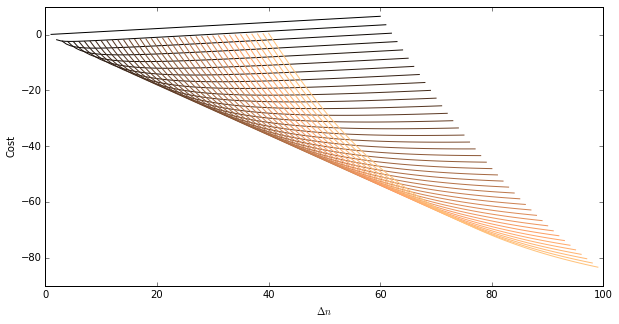

In [63]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

nm = 100
alph = 0.01

ST = 60

plt.figure(figsize=(10,5))
for ne in range(0,nm-ST):
    dn = np.linspace(ne+1,ne+ST,80)
    C = dn*(0.1-1*np.sin(np.pi*ne/dn -alph))
    plt.plot(dn,C,color=plt.cm.copper(ne/float(nm-ST)))
    plt.ylabel('Cost')
    plt.xlabel('$\Delta n$')
    

If $p_f$ is smaller and $u_w$ is larger, then it's possible to have a fourth option where both $n_L>0$ and $n_H<n_{max}$.

Long story short, we can uniquely identify the transition point given simply $n_{max}$, $S$, $T$, $p_0$, $p_f$, $u_w$, and $u_m$.  Knowing the transition point will allow us to calculate the wait time $\tau(t)$ in the presence of price optimization.

### constant job submissions

We begin by analyzing a constant submission profile $s(t) = S/T$.  When the period of curtailment begins we will drop to $n_L$ running machines for a period $T_L = T n_e/\Delta n$

During this period we will experience an increase in the queue

$$\frac{dq(t)}{dt} = S/T - n_L$$

which will lead at time, $t$, to a queue of length $q(t) = (\Delta n - n_e)t$

After time $T_L$ this queue will decrease at a rate

$$\frac{dq(t)}{dt} = S/T - n_H$$

giving rise to a decrease in the queue over time of the form

$$q(t) = (S/T-n_L)T_L - (n_H - S/T)(t-T_L) = T n_e (1-t/T)$$

which gives rise to a two phase wait time, $\tau(t)$, 

For $t<T_L n_L T/S$

$$ \tau = \frac{\Delta n - n_e}{n_L}t$$

For $T_L n_L T/S<t<T$

$$ \tau = \frac{Tn_e}{n_H} (1-t/T) $$


The maximum wait time is therefore, $\tau_{max} = T n_e/n_H (1-n_e/\Delta n) $

### Time varying job submissions
However, our cluster usage data suggests that in reality there is a near perfect correlation between energy prices and job submissions.  This will lead to a far more complex change in the queue length and the wait time.  Rather than solving this analytically, we have chosen to show the average change in wait time under a real-world example.